# 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강'

character_images  ex2.ipynb  face_images  project8_1.ipynb  project8.ipynb
ex1.ipynb	  ex.ipynb   models	  project8_2.ipynb


In [3]:
import os
from glob import glob
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import numpy as np

import cv2
import dlib

In [4]:
face_img_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images'
char_img_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/character_images'
model_path = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/models/shape_predictor_68_face_landmarks.dat'

In [5]:
face_img_paths = glob(os.path.join(face_img_dir, "*.*"))

face_img_paths

['/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6680).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6674).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6764).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6747).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6857).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6862).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6861).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6915).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6908

In [6]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths)):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgb = cv2.resize(img_rgb, (1000, 1000))
    
    plt.subplot(6, 4, idx+1)
    plt.imshow(img_rgb)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

- 인종, 피부색, 배경, 얼굴 각도, 조명, 얼굴의 노출 정도 등을 고려하여 테스트 할 이미지들을 선정하였음.

In [7]:
detector_hog = dlib.get_frontal_face_detector()

In [8]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths)):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgb = cv2.resize(img_rgb, (1000, 1000))
    
    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA)

    plt.subplot(6, 4, idx+1)
    plt.imshow(img_rgb)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths)):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgb = cv2.resize(img_rgb, (1000, 1000))

    list_landmarks = []
    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        
        points = landmark_predictor(img_rgb, dlib_rect)
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_rgb, point, 6, (0, 255, 255), -1)

    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA)

    plt.subplot(6, 4, idx+1)
    plt.imshow(img_rgb)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

- 얼굴 영역과 해당 영역의 랜드마크 점들을 검출한 결과 아래의 경우들에 대하여 검출에 실패함.
- 눈썹이 가려진 경우
- 조명이 너무 밝은 경우
- 얼굴이 기울어진 경우
- 안면 윤곽이 사진에 전부 나오지 않는 경우

# 캐릭터 사진 합성
- 사진을 합성하기 전에 아래의 사항들을 고려하겠음.
- 랜드마크의 번호를 확인하고 가장 적절한 사진의 위치를 지정할 것.
- 얼굴의 기울기에 따라 합성할 사진도 같이 기울어질 것.
- 얼굴의 크기에 따라 사진의 크기도 조절할 것.

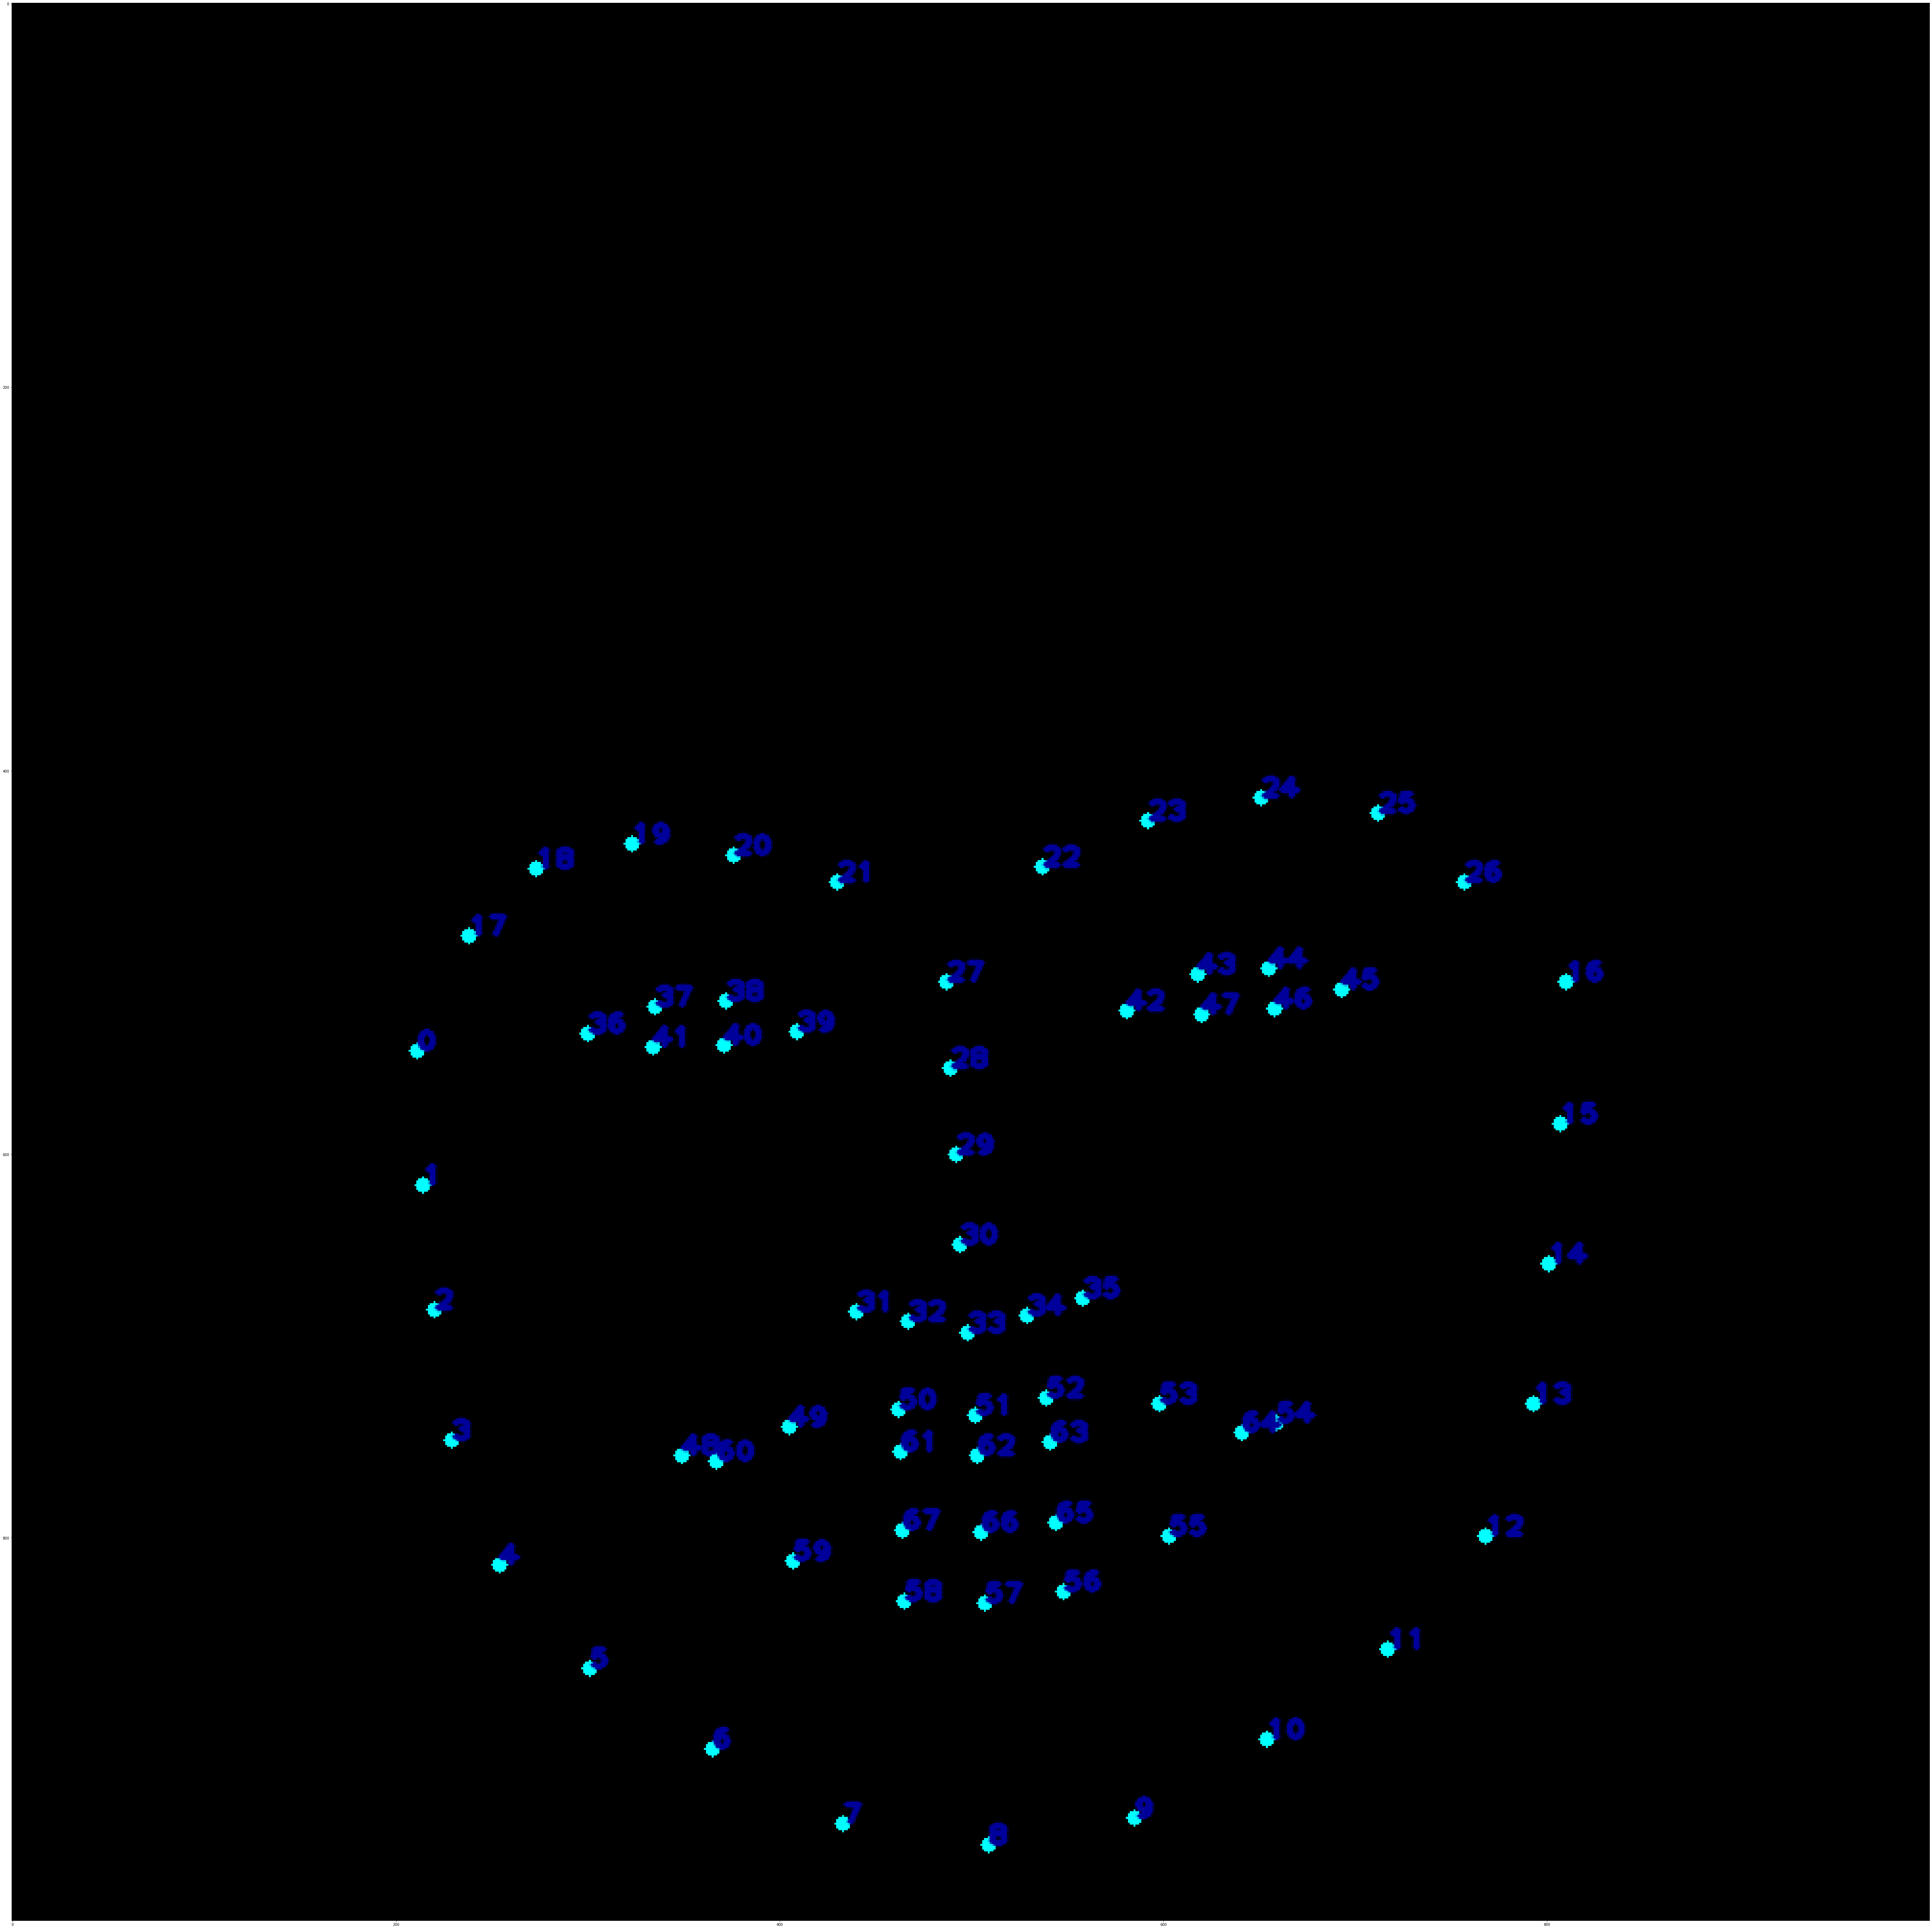

In [11]:
# 테스트 이미지 로딩 및 색상 변경
img = cv2.imread(face_img_paths[-1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (1000, 1000))
# plt.imshow(img)

# 얼굴 영역 검출기 생성 및 영역 좌표 생성
dlib_rects = detector_hog(img, 1)
dlib_rect = dlib_rects[0]

l = dlib_rect.left()
t = dlib_rect.top()
r = dlib_rect.right()
b = dlib_rect.bottom()

# print(dlib_rect)
# print(l, t, r, b)

# 랜드마크 검출 및 좌표 리스트 생성
landmarks = landmark_predictor(img, dlib_rect)
landmarks = list(map(lambda p: (p.x, p.y), points.parts()))
# print(landmarks)

# 좌표 이미지 합성
landmark_img = np.zeros_like(img)
for i, point in enumerate(landmarks):
    cv2.circle(landmark_img, point, 4, (0, 255, 255), -1)
    font =  cv2.FONT_HERSHEY_PLAIN
    cv2.putText(landmark_img, str(i), point, font, 1,(0,0,155), 2, cv2.LINE_AA)

plt.figure(figsize=(100, 100))
plt.imshow(landmark_img)

- 코의 랜드마크 인덱스는 27 ~ 35로 구성됨.
- 합성할 이미지를 코의 정중앙에 위치시키며 기울기 또한 적용하기 위하여 다음의 과정을 적용하겠음.
- 코의 가장 정중앙 위치는 30, 31, 33, 35 인덱스의 좌표의 중앙점을 사용.
- 코의 기울기는 (31, 35) 선분의 기울기를 적용.
- 합성 이미지의 크기는 (31, 35), (30, 33) 선분 길이를 적용하겠음.

스티커 사이즈 : (512, 512, 3)


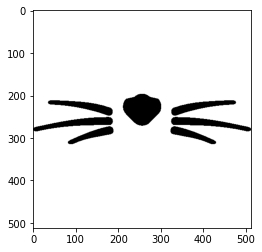

In [12]:
sticker_path = os.path.join(char_img_dir, "cat.png")
cat_sticker = cv2.imread(sticker_path)
plt.imshow(cat_sticker)
print("스티커 사이즈 :", cat_sticker.shape)

- 스티커 이미지 준비.

스티커 사이즈 : (130, 512, 3)


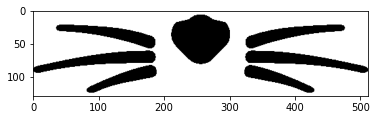

In [13]:
resized_cat_sticker = cat_sticker[190:320,:]
plt.imshow(resized_cat_sticker)
print("스티커 사이즈 :", resized_cat_sticker.shape)

- 기존 스티커 이미지에서 실제 이미지가 있는 부분만 사용함.

In [14]:
import math

In [15]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths)):
    # 테스트 이미지 로딩 및 색상 변경
    img = cv2.imread(face_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (2000, 2000))
    # plt.imshow(img)

    # 얼굴 영역 검출기 생성 및 영역 좌표 생성
    dlib_rects = detector_hog(img, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        # 랜드마크 검출 및 좌표 리스트 생성
        landmarks = landmark_predictor(img, dlib_rect)
        landmarks = list(map(lambda p: (p.x, p.y), landmarks.parts()))
        # landmarks.append(points)

    # # 좌표 이미지 합성
    # for landmarks in landmarks:
    #     for i, point in enumerate(landmark):
    #         # print(point)
    #         cv2.circle(img, point, 4, (0, 255, 255), -1)
    #         font =  cv2.FONT_HERSHEY_PLAIN
    #         cv2.putText(img, str(i), point, font, 1,(0,0,155), 2, cv2.LINE_AA)
    # plt.imshow(img)

    # 코 중앙점 계산
    mid_point_x = (landmarks[30][0] + landmarks[31][0] + landmarks[33][0] + landmarks[35][0])/4
    mid_point_y = (landmarks[30][1] + landmarks[31][1] + landmarks[33][1] + landmarks[35][1])/4
    mid_point = [mid_point_x, mid_point_y]

    # 코의 크기 계산
    a = landmarks[35][0] - landmarks[31][0]
    b = landmarks[35][1] - landmarks[31][1]
    c = a**2 + b**2
    nose_width = math.sqrt(c)

    a = landmarks[30][0] - landmarks[33][0]
    b = landmarks[30][1] - landmarks[33][1]
    c = a**2 + b**2
    nose_height = math.sqrt(c)

    # 코 기울기 계산
    a = landmarks[35][0] - landmarks[31][0]
    b = -(landmarks[35][1] - landmarks[31][1])
    angle = 180 / math.pi * math.atan(b/a)
    # angle = 30

    # 스티커 이미지 크기 변환
    scale_factor = 1.5 # 스티커 이미지의 스케일링 팩터
    sticker_img_w = int(scale_factor * nose_width)
    sticker_img_h = int(scale_factor * nose_height)
    sticker_img = cv2.resize(resized_cat_sticker, (sticker_img_w, sticker_img_h))
    # plt.imshow(sticker_img)

    # 배경 크기 계산
    background_h = int(sticker_img_w * abs(math.sin(angle * math.pi / 180)) + sticker_img_h * abs(math.cos(angle * math.pi / 180)))
    background_w = int(sticker_img_w * abs(math.cos(angle * math.pi / 180)) + sticker_img_h * abs(math.sin(angle * math.pi / 180)))
    background = 255 * np.ones([background_h, background_w, 3])
    # plt.imshow(background)
    a = math.ceil(background.shape[0]/2 - sticker_img.shape[0]/2)
    b = math.ceil(background.shape[0]/2 + sticker_img.shape[0]/2)
    c = math.ceil(background.shape[1]/2 - sticker_img.shape[1]/2)
    d = math.ceil(background.shape[1]/2 + sticker_img.shape[1]/2)
    background[a:b, c:d, :] = sticker_img
    # plt.imshow(background)

    # 스티커 이미지 회전 및 배경 크기 조절
    matrix = cv2.getRotationMatrix2D((background_w/2, background_w/2), angle, scale=1)
    sticker_img = cv2.warpAffine(background, matrix, (background_w, background_h), borderValue=(255, 255, 255))

    # plt.imshow(sticker_img)

    # 이미지 합성
    x = mid_point_x
    y = mid_point_y
    # a, b는 세로 좌표
    a = math.ceil(y - sticker_img.shape[0]/2)
    b = math.ceil(y + sticker_img.shape[0]/2)
    # c, d는 가로 좌표
    c = math.ceil(x - sticker_img.shape[1]/2)
    d = math.ceil(x + sticker_img.shape[1]/2)
    sticker_area = img[a:b, c:d]
    img[a:b, c:d] = np.where(sticker_img==255,sticker_area,sticker_img).astype(np.uint8)

    plt.subplot(6, 4, idx+1)
    plt.imshow(img)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

# 결과 분석
- 이전 과정에서 눈썹이 가려짐, 조명이 너무 밝음, 얼굴이 많이 기울어짐, 안면 윤곽이 사진에 전부 나오지 않음 등으로 인해 얼굴을 인식하지 못하였던 (2,1), (2,3), (6,3)의 이미지에는 고양이 수염이 제대로 적용되지 않았음.
- 추가적으로 (1,4)의 이미지에 고양이 수염이 잘못 인식되는 결과가 나타남. 이에 대한 분석은 추가적으로 진행하겠음.
- 코의 기울어짐 정도, 사람 코의 크기, 사람 코의 정중앙 위치 등을 고려하여 고양이 수염 이미지의 크기, 기울기, 위치 등이 잘 반영되었음.